### Task # 2 - To Explore Supervise Machine Learning

#### Predicting the percentage of marks that a student is expected to score based upon the number of hours they studied. 
#### Technique : Linear Regression 
#### Tool           : Jupyter Notebook (Python) 
#### Data           : http://bit.ly/w-data



In [1]:
# Importing libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Loading dataset from link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [3]:
# Viewing top 5 row of data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Knowing the rows and columns of dataset
data.shape

(25, 2)

In [5]:
# information on dataset type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [6]:
# checking for missing or null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
# descriptive statistics of dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0.5, 1.0, 'Score Dsitribution')

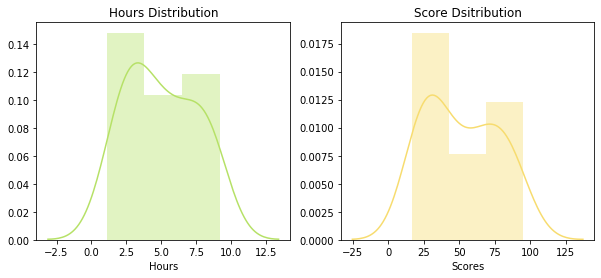

In [8]:
# knowing the nature of distribution in both variables
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
p1 = sns.distplot(data['Hours'],label='Hours',color='#B6E167')
plt.title('Hours Distribution')
plt.subplot(1,2,2)
p2 = sns.distplot(data['Scores'],label='Scores',color='#F7DC6F')
plt.title('Score Dsitribution')

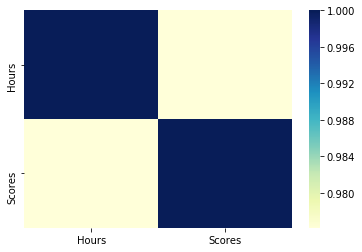

In [9]:
# finding the correlation among the variables
sns.heatmap(data.corr(), cmap ="YlGnBu")

<Figure size 432x288 with 0 Axes>

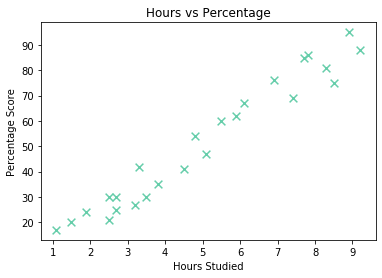

In [10]:
# plot to finding relation between hours and percentage
plt.figure()
data.plot.scatter(x='Hours', y='Scores', color = '#66CDAA', marker = 'x', s=60)  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [11]:
# assigning dependent and independent variables
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [12]:
# splitting data set into training and testing data
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [13]:
# fitting the linear regression model in the data
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(x_train, y_train) 
line = model.coef_*x+model.intercept_

In [14]:
# obtaining the intercept and coeffient values to for regression equation
print('Intercept of given fiited line is:{}'.format(model.intercept_))
print('Coefficient of x for given fiited line is:{}'.format(model.coef_))

Intercept of given fiited line is:2.018160041434683
Coefficient of x for given fiited line is:[9.91065648]


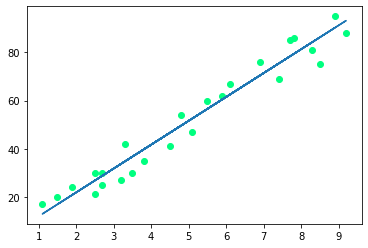

In [15]:
# plot to fit the regression line
plt.scatter(x, y, color = '#00FF7F')
plt.plot(x, line)

In [16]:
# predicted values
y_pred = model.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [17]:
# comparing the actual and predicted values
compare = pd.DataFrame({'Actual':y_test})
compare.reset_index(drop=True,inplace=True)
compare['Predicted']=y_pred
compare['Deviation']=abs(compare['Actual']-compare['Predicted'])
compare

,Actual,Predicted,Deviation
0,20,16.884145,3.115855
1,27,33.732261,6.732261
2,69,75.357018,6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


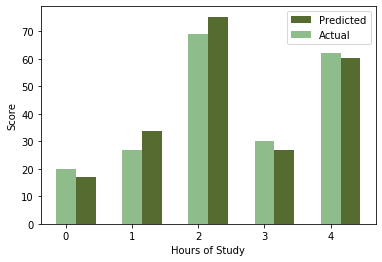

In [18]:
# visualizing the actual and predicted values
plt.bar(np.arange(5)+0.3,compare.Predicted,width=0.3,label='Predicted', color = '#556B2F')
plt.bar(np.arange(5),compare.Actual,width=0.3,label='Actual', color = '#8FBC8B')
plt.xlabel('Hours of Study')
plt.ylabel('Score')
plt.legend()

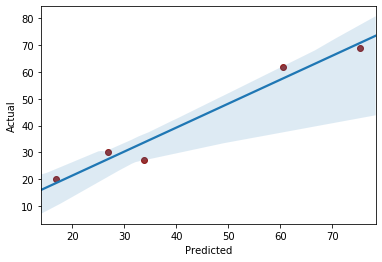

In [19]:
sns.regplot('Predicted','Actual',data=compare,scatter_kws={'color':'#800000'})

In [20]:
# metrics to measure the performance 
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE1 = mean_absolute_error(y_pred , y_test)
RMSE1 = np.sqrt(mean_squared_error(y_pred , y_test))
print('Mean Absolute Error = ',MAE1.round(3))
print('Root Mean Squared Error = ',RMSE1.round(3))

Mean Absolute Error =  4.184
Root Mean Squared Error =  4.647


In [22]:
# predicted score if a student study for 9.25 hrs in a day
n = float(input())
hours = np.array([n])
hours = hours.reshape(-1, 1)
pred = model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

9.25
No of Hours = [[9.25]]
Predicted Score = 93.69173248737538
